# グラフ

## 扱うデータセット
- 人工的なデータ（データに意味はない，定義確認用の小さいグラフ）
- 空手クラブ（小規模な社会ネットワーク; 無向グラフ）
- 名古屋市地下鉄（小規模なネットワーク; 無向グラフ）
- プログラミング言語ネットワーク（中規模のネットワーク; 有向グラフ-> 無向グラフにする？）

## 講義計画
1. グラフとは & 経路
2. グラフ構造の性質
3. ノードの中心性
4. コミュニティ発見
5. ウェブグラフ
6. グラフ埋め込み
7. 総合演習 - 社会ネットワーク分析（テキスト解析 or Wikipedia歴史人物）


In [1]:
import numpy as np
import networkx as nx

%matplotlib inline

In [2]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

--- 

## グラフ埋め込み

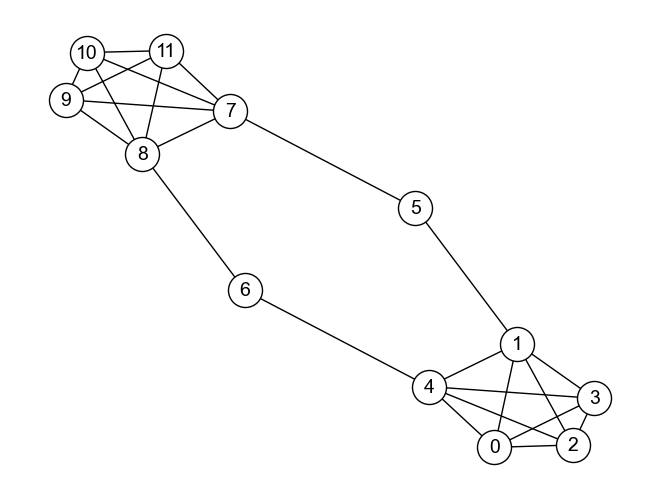

In [60]:
G = nx.barbell_graph(m1=5, m2=2)
G.add_edge(5, 7)
G.add_edge(4, 6)
G.remove_edge(5, 6)
G.remove_edge(6, 7)
G.add_edge(6, 8)
G.remove_edge(5, 4)
G.add_edge(5, 1)
pos = nx.spring_layout(G, seed=123)
nx.draw(G, pos, **DRAW_CONFIG)

#### 隣接行列

In [61]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]])

In [62]:
# ノード5の特徴ベクトル
v5 = A[5, :]
v5

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [63]:
# ノード6の特徴ベクトル
v6 = A[6, :]
v6

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [64]:
import numpy as np

def cosine_similarity(v_a, v_b):
    norm_a = np.linalg.norm(v_a, 2)
    norm_b = np.linalg.norm(v_b, 2)
    inner_product = np.dot(v_a, v_b)
    return inner_product / (norm_a * norm_b)

In [65]:
# コサイン類似度
cosine_similarity(v5, v6)

np.float64(0.0)

#### DeepWalk

In [66]:
import random
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'gensim'

In [ ]:
paths = list(nx.generate_random_paths(G, sample_size=200, path_length=5))
model = Word2Vec(paths, vector_size=5, window=5, min_count=2, epochs=5)

In [ ]:
cosine_similarity(model.wv[5], model.wv[6])

In [ ]:
cosine_similarity(model.wv[1], model.wv[2])

---
## クイズ

- 空手クラブのグラフ
- プログラミング言語
- 日本地図（[都道府県グラフ](https://www.ajimatics.com/entry/2018/01/30/133238)）-> 各種中心性
- 病気ネットワーク

空手クラブはクイズではなく，スライド内 or Hands-on内で使った方がよいかも

In [ ]:
G_karate = nx.karate_club_graph()
pos = nx.spring_layout(G_karate, seed=123)
nx.draw(G_karate, pos, **DRAW_CONFIG)

In [ ]:
KARATE_DRAW_CONFIG = {
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 400,
    'font_size': 14,
    'font_color': 'white',
    'font_family': 'Arial',
}

node_colors = ['red' if G_karate.nodes[n]['club'] == 'Mr. Hi' else 'blue' for n in G_karate.nodes()]
nx.draw(G_karate, pos, **KARATE_DRAW_CONFIG, node_color=node_colors)

In [ ]:
# クイズ計算させる
def density(G):
    num_node = len(G.nodes())
    num_edge = len(G.edges())
    max_possible_edge_num = num_node * (num_node - 1) / 2
    return num_edge / max_possible_edge_num

In [ ]:
density(G_karate)

In [ ]:
nx.draw(G, **DRAW_CONFIG)

In [ ]:
def get_shortest_distance_by_bfs(node_from, node_to, G):
    dist = {node_from: 0}
    queue = [node_from]

    while len(queue) > 0:
        # 先頭を取得
        target_node = queue.pop(0)
        if target_node == node_to:
            break
        else:
            # 隣接ノードを展開（キューに追加）
            for neighbor in G.neighbors(target_node):
                if neighbor not in dist and neighbor not in queue:
                    dist[neighbor] = dist[target_node] + 1
                    queue.append(neighbor)

    if node_to in dist:
        return dist[node_to]
    else:
        # たどり着けない（パスがない）ノードに対しては無限大
        return float('inf')

In [ ]:
get_shortest_distance_by_bfs(4, 7, G)

In [ ]:
get_shortest_distance_by_bfs(1, 6, G)

In [ ]:
get_shortest_distance_by_bfs(4, 1, G)